# AST 7939 Week 5

## Regression methods

### [Regression with DT](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [1]:
import numpy as np

# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

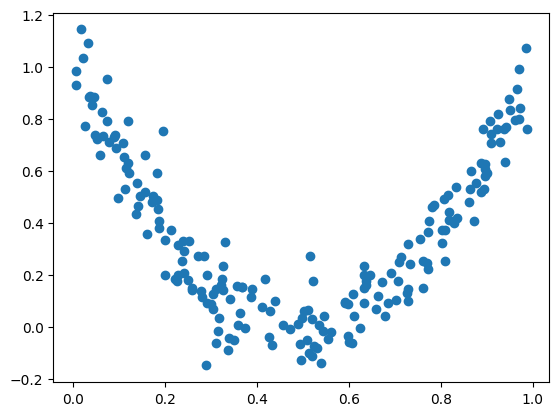

In [2]:
import matplotlib.pyplot as plt 

plt.scatter(X,y)

In [3]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

Text(0.5, 1.0, 'max_depth=3')

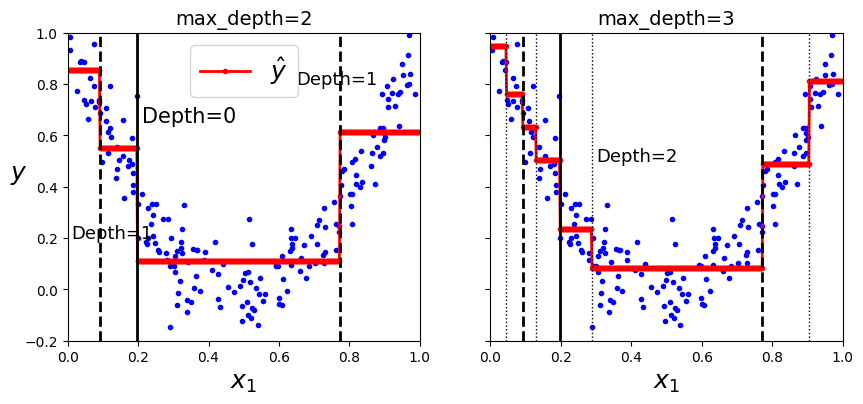

In [4]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)

tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

In [5]:
tree_reg1.predict([[0.5]])

array([0.11063973])

Text(0.5, 1.0, 'min_samples_leaf=10')

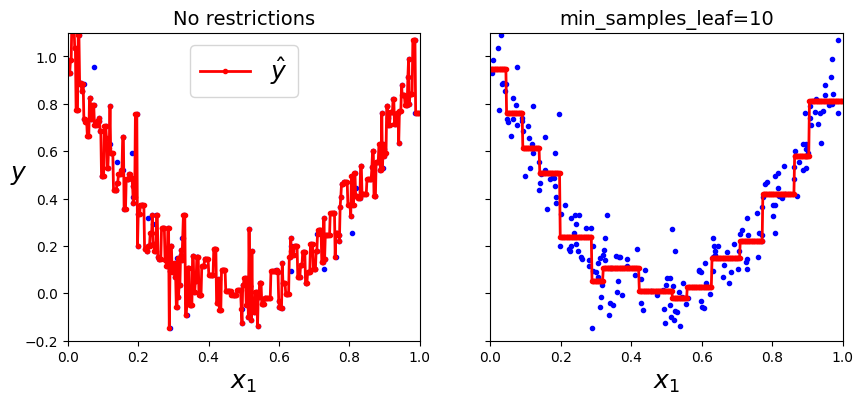

In [6]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)


### [Regression with kNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise
y[::5] += 1 * (0.5 - np.random.rand(8))

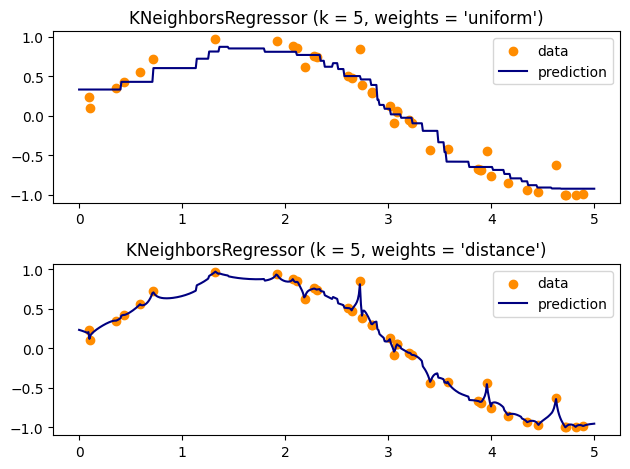

In [10]:
n_neighbors = 5

for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    knn.fit(X, y)
    y_ = knn.predict(T)
    
    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()

In [13]:
knn.predict(np.array([[1.5]]))

array([0.89712051])

### [Regression with SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

### Here's an example of linear SVR.

In [14]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

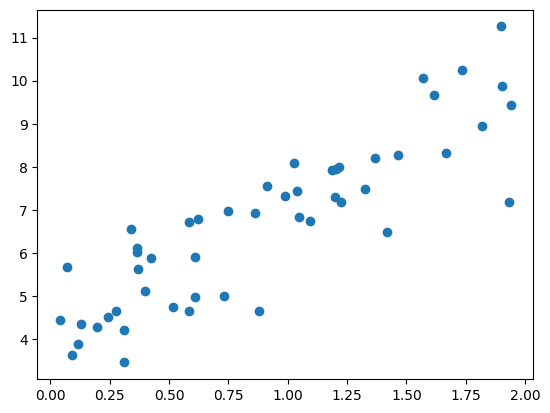

In [15]:
plt.scatter(X, y)

In [16]:
from sklearn.svm import LinearSVR

# You need to specify desired epsilon.
# Here, I'm making two linear SVR models, one with epsilon=1.5 and the other with epsilon=0.5.

svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

# To visualize the support vectors.
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

Text(0.5, 1.0, '$\\epsilon = 0.5$')

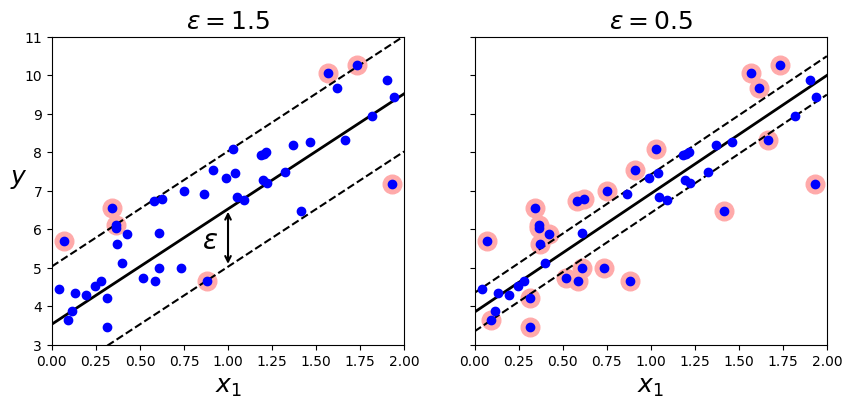

In [17]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.85, 5.5, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)


### And here's an example of non-linear SVR

In [18]:
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
# Add noise
y[::5] += 3 * (0.5 - np.random.rand(8))

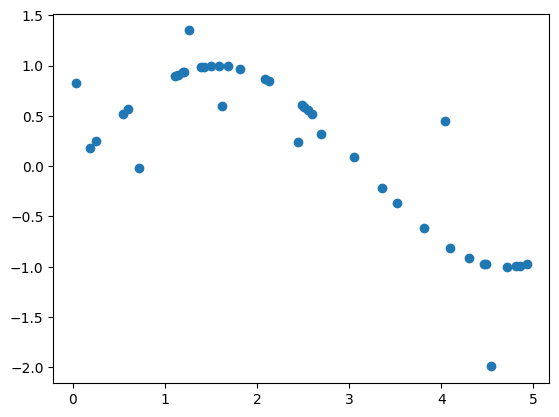

In [19]:
plt.scatter(X, y)

In [20]:
from sklearn.svm import SVR

# I'm making three polynomial SVR models.

svm_poly1 = SVR(kernel="poly", degree=1, C=100, epsilon=0.1, coef0=1.)
svm_poly2 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, coef0=1.)
svm_poly3 = SVR(kernel="poly", degree=3, C=100, epsilon=0.1, coef0=1.)

svm_poly1.fit(X, y)
svm_poly2.fit(X, y)
svm_poly3.fit(X, y)

SVR(C=100, coef0=1.0, kernel='poly')

Text(0.5, 1.0, 'Third-degree polynomial')

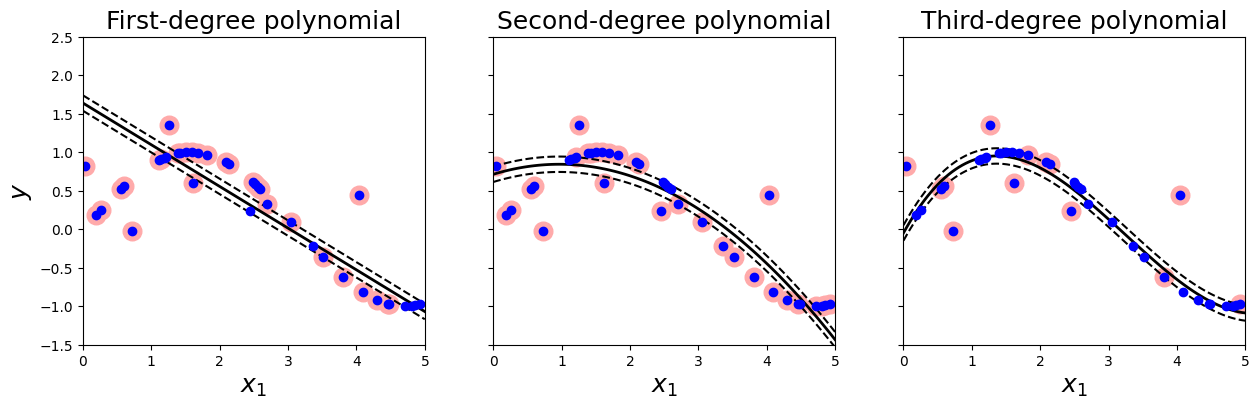

In [21]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 4), sharey=True)

plt.sca(axes[0])
plot_svm_regression(svm_poly1, X, y, [0, 5, -1.5, 2.5])
plt.title("First-degree polynomial", fontsize=18)
plt.ylabel(r"$y$", fontsize=18)

plt.sca(axes[1])
plot_svm_regression(svm_poly2, X, y, [0, 5, -1.5, 2.5])
plt.title("Second-degree polynomial", fontsize=18)

plt.sca(axes[2])
plot_svm_regression(svm_poly3, X, y, [0, 5, -1.5, 2.5])
plt.title("Third-degree polynomial", fontsize=18)

### TODO: Hyperparameter optimization

Optimize hyperparameters (C, gamma) for SVR with "rbf" kernel and epsilon=0.1.

In [22]:
from sklearn.model_selection import GridSearchCV

parameters = [{'gamma': [1e-4, 1e-3, 0.01, 0.1, 1.0, 10.0, 100., 1000.],
               'C': [1, 10, 100, 1000, 10000]}
             ]
svr_gs = GridSearchCV(SVR(kernel='rbf', epsilon=0.1), parameters, cv=5, verbose=3)
svr_gs.fit(X, y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ................C=1, gamma=0.0001;, score=-0.044 total time=   0.0s
[CV 2/5] END ...............C=1, gamma=0.0001;, score=-14.634 total time=   0.0s
[CV 3/5] END ................C=1, gamma=0.0001;, score=-2.802 total time=   0.0s
[CV 4/5] END ................C=1, gamma=0.0001;, score=-2.410 total time=   0.0s
[CV 5/5] END ...............C=1, gamma=0.0001;, score=-27.008 total time=   0.0s
[CV 1/5] END .................C=1, gamma=0.001;, score=-0.087 total time=   0.0s
[CV 2/5] END ................C=1, gamma=0.001;, score=-13.209 total time=   0.0s
[CV 3/5] END .................C=1, gamma=0.001;, score=-3.501 total time=   0.0s
[CV 4/5] END .................C=1, gamma=0.001;, score=-1.777 total time=   0.0s
[CV 5/5] END ................C=1, gamma=0.001;, score=-25.083 total time=   0.0s
[CV 1/5] END ..................C=1, gamma=0.01;, score=-5.549 total time=   0.0s
[CV 2/5] END ..................C=1, gamma=0.01;

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [1, 10, 100, 1000, 10000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                    1000.0]}],
             verbose=3)

In [23]:
svr_gs.best_estimator_

SVR(C=10000, gamma=0.1)

Text(0, 0.5, '$y$')

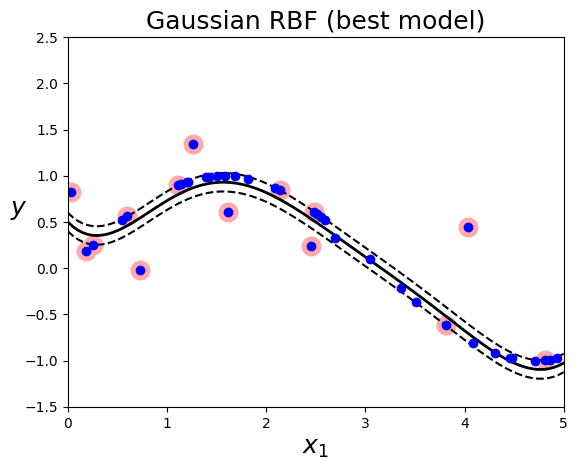

In [24]:
plot_svm_regression(svr_gs.best_estimator_, X, y, [0, 5, -1.5, 2.5])

plt.title("Gaussian RBF (best model)", fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)


### TODO (optional): Bitcoin challenge for extra credit?!

Make a regression model and submit your prediction for 2023 March (daily BTC price), by the last day of 2023 February via Canvas. In the first week of 2023 April, I will compute your scores (metric = [mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error)). The winner will get +5 pts in your final homework score. The next three will get +2 pts in your homework score.

In [26]:
# !pip install pandas-datareader

import pandas_datareader
from pandas_datareader import data

btc = data.DataReader('CBBTCUSD', start='2004', end='2024', data_source="fred")
btc

,CBBTCUSD
DATE,
2014-12-01,370.00
2014-12-02,378.00
2014-12-03,378.00
2014-12-04,377.10
2014-12-05,NaN
...,...
2023-02-03,23426.40
2023-02-04,23318.95
2023-02-05,22938.03


In [27]:
btc = btc.dropna()
btc

,CBBTCUSD
DATE,
2014-12-01,370.00
2014-12-02,378.00
2014-12-03,378.00
2014-12-04,377.10
2014-12-06,378.00
...,...
2023-02-03,23426.40
2023-02-04,23318.95
2023-02-05,22938.03


Text(0, 0.5, 'Price [USD]')

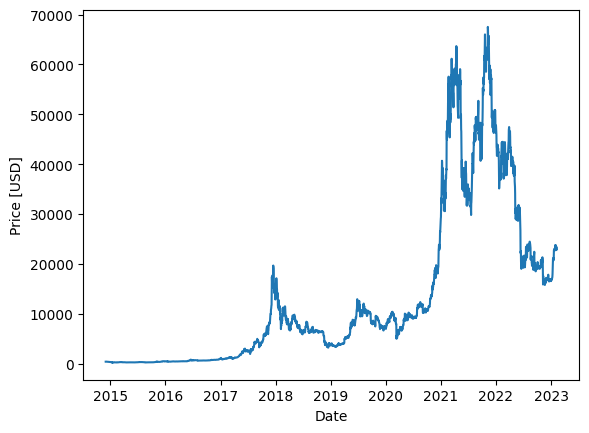

In [28]:
plt.plot(btc['CBBTCUSD'])
plt.xlabel('Date')
plt.ylabel('Price [USD]')